In [1]:
from scipy import misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

In [45]:
#full dataset gzipped found here : https://www.reddit.com/r/redditdata/comments/6640ru/place_datasets_april_fools_2017/
dataset = pd.read_csv("dataset/tile_placements.csv")
dataset.head(10)

,ts,user,x_coordinate,y_coordinate,color
0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0
1,1491171651000,5KjCuLCk/VTXBIgaszopYecZ3uU=,190,791,0
2,1491105072000,toyjOAoAZMtlGZ3hXm5/LYsi+iA=,1,753,0
3,1491235861000,TGENUMJ6VmaBRr8ae9yP0MWQ66g=,233,931,0
4,1491163179000,usR8PLvN90gdivTbszEqhvPcXI4=,526,663,0
5,1491049593000,PhCeV35qg+Kd4HZH2A8YsmwE65w=,578,327,0
6,1491144746000,h36EHV8mxPdVf6/KSVcVJdQD+3g=,555,330,0
7,1491233125000,Fs34pA4xcfKSvw/c+kS+P31aB+s=,906,95,0
8,1491149990000,JSi4ekmizWOUcjae6TFFCLUGeH8=,862,480,0
9,1491098731000,otYEXzF2K9RLO0VCBSS/bpOcek4=,404,959,0


In [37]:
canvaFinal = misc.imread("resources/canvaFinal.png")
canvaCorr = misc.imread("resources/canvaCorrected.png")

#The color value are indexed correctly in the array.
colors = [
    '#FFFFFF',
    '#E4E4E4',
    '#888888',
    '#222222',
    '#FFA7D1',
    '#E50000',
    '#E59500',
    '#A06A42',
    '#E5D900',
    '#94E044',
    '#02BE01',
    '#00E5F0',
    '#0083C7',
    '#0000EA',
    '#E04AFF',
    '#820080'
]

def RGBToHex(value):
    return ('#%02x%02x%02x' % (value[0], value[1], value[2])).upper()

def HexToRGB(hexStr):
    return tuple(int(hexStr.strip('#')[i:i+2], 16) for i in (0, 2 ,4))   

In [5]:
def arePixEq(p1, p2):
    match = True
    for k in range(3):
        match = match and p1[k] == p2[k]
    return match
        
total = 1000**2
count = 0
#I've not checked all colors so far, but I'll assume both image have the exact same RGB component for pixels of the same color.
for i in range(999):
    for j in range(999):
        canvaFinal[i][j]
        pix2 = canvaCorr[i][j]
        if not arePixEq(canvaFinal[i][j], canvaCorr[i][j]):
            count += 1

print("Number of pixel vandalised : %d"%(count))
print("Percentage of pixel vandalised : %lf"%((100*count)/total))

Number of pixel vandalised : 72681
Percentage of pixel vandalised : 7.268100


In [7]:
#init of all hit buckets
mismatches = {}
colorsHitF = {}
colorsHitC = {}

for c in colors:
    colorsHitF[c] = 0
    
for c in colors:
    colorsHitC[c] = 0

for i in range(999):
    for j in range(999):
        fPix = canvaCorr[i][j]
        cPix = canvaFinal[i][j]
        convF = RGBToHex(fPix)
        convC = RGBToHex(cPix)
        if convF not in colors:
            cAddF = 'f'+convF
            if cAddF in mismatches.keys():
                mismatches[cAddF] += 1
            else:
                mismatches[cAddF] =1
        else:
            colorsHitF[convF] += 1
        if convC not in colors:
            cAddC = 'c'+convC
            if convC in mismatches.keys():
                mismatches[cAddC] += 1
            else:
                mismatches[cAddC] =1
        else:
            colorsHitC[convC] += 1
            
print(len(mismatches))
mismatches
for k,v in mismatches.items():
    print("Color %s was mismatched %d times"%(k, v))
    
print("HitBucket content of Final Canva")
for k,v in colorsHitF.items():
    print("\tColor %s was detected %d times"%(k, v))
    
print("HitBucket content of Corrected Canva")
for k,v in colorsHitC.items():
    print("\tColor %s was detected %d times"%(k, v))


4
Color c#00D3DD was mismatched 1 times
Color f#00D3DD was mismatched 30425 times
Color f#CF6EE4 was mismatched 13280 times
Color c#CF6EE4 was mismatched 1 times
HitBucket content of Final Canva
	Color #FFFFFF was detected 153789 times
	Color #E4E4E4 was detected 27185 times
	Color #888888 was detected 25183 times
	Color #222222 was detected 257353 times
	Color #FFA7D1 was detected 29123 times
	Color #E50000 was detected 120132 times
	Color #E59500 was detected 57168 times
	Color #A06A42 was detected 17570 times
	Color #E5D900 was detected 63897 times
	Color #94E044 was detected 16800 times
	Color #02BE01 was detected 39484 times
	Color #00E5F0 was detected 0 times
	Color #0083C7 was detected 33516 times
	Color #0000EA was detected 93438 times
	Color #E04AFF was detected 0 times
	Color #820080 was detected 19658 times
HitBucket content of Corrected Canva
	Color #FFFFFF was detected 154430 times
	Color #E4E4E4 was detected 26926 times
	Color #888888 was detected 26024 times
	Color #2222

#00E5F0 vs #00D3DD


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


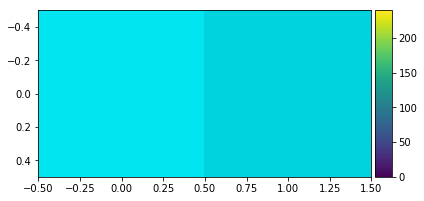

#00E5F0 vs #CF6EE4


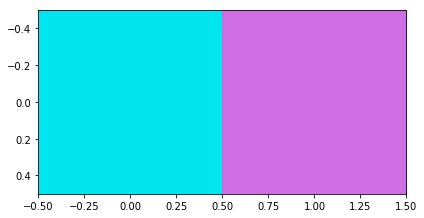

#E04AFF vs #00D3DD


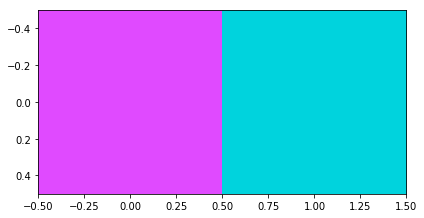

#E04AFF vs #CF6EE4


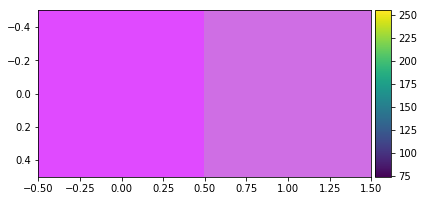

'\narr0 = np.array([[HexToRGB(absentColors[0]), HexToRGB(mismatchColors[0])]], dtype=np.uint8)\nio.imshow(arr0)\nplt.show()\narr1 = np.array([[HexToRGB(absentColors[1]), HexToRGB(mismatchColors[1])]], dtype=np.uint8)\nio.imshow(arr1)\nplt.show()\n'

In [44]:
absentColors = ['#00E5F0','#E04AFF']
mismatchColors = ['#00D3DD','#CF6EE4']
HexToRBG('#00E5F0')
#arr = np.array([[HexToRGB(absentColors[0]), HexToRGB(mismatchColors[0])]], dtype=np.uint8)

for a in absentColors:
    for m in mismatchColors:
        print(a+ " vs " +m)
        arr = np.array([[HexToRGB(a), HexToRGB(m)]], dtype=np.uint8)
        io.imshow(arr)
        plt.show()
